Random Network:
Step 0: Healthy diet adoption rate: 0.89
Step 1: Healthy diet adoption rate: 1.00
Step 2: Healthy diet adoption rate: 1.00
Step 3: Healthy diet adoption rate: 1.00
Step 4: Healthy diet adoption rate: 1.00
Step 5: Healthy diet adoption rate: 1.00
Step 6: Healthy diet adoption rate: 1.00
Step 7: Healthy diet adoption rate: 1.00
Step 8: Healthy diet adoption rate: 1.00
Step 9: Healthy diet adoption rate: 1.00


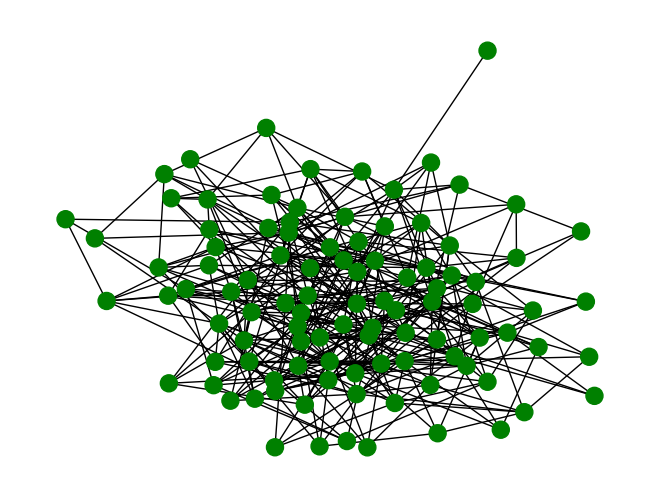

In [ ]:
from diffusion import DiffusionModel

print(f"Random Network:")
model_random = DiffusionModel(network_type="random", initial_adopters=0.20)
model_random.run_model(10)

Random Network:
Step 0: Healthy diet adoption rate: 0.13
Step 1: Healthy diet adoption rate: 0.13
Step 2: Healthy diet adoption rate: 0.13
Step 3: Healthy diet adoption rate: 0.13
Step 4: Healthy diet adoption rate: 0.13
Step 5: Healthy diet adoption rate: 0.13
Step 6: Healthy diet adoption rate: 0.13
Step 7: Healthy diet adoption rate: 0.13
Step 8: Healthy diet adoption rate: 0.13
Step 9: Healthy diet adoption rate: 0.13


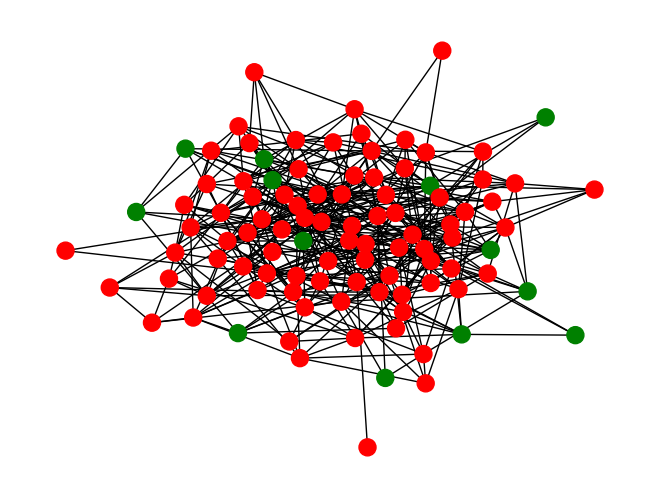

Small-World Network:
Step 0: Healthy diet adoption rate: 0.27
Step 1: Healthy diet adoption rate: 0.36
Step 2: Healthy diet adoption rate: 0.43
Step 3: Healthy diet adoption rate: 0.46
Step 4: Healthy diet adoption rate: 0.51
Step 5: Healthy diet adoption rate: 0.56
Step 6: Healthy diet adoption rate: 0.63
Step 7: Healthy diet adoption rate: 0.73
Step 8: Healthy diet adoption rate: 0.79
Step 9: Healthy diet adoption rate: 0.81


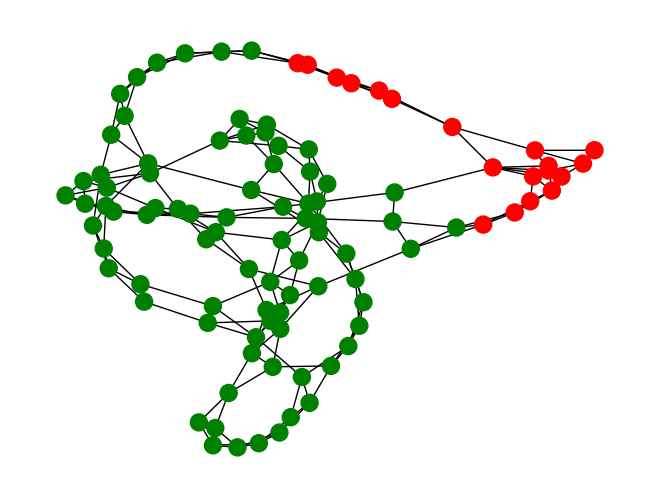

Scale-Free Network:
Step 0: Healthy diet adoption rate: 0.22
Step 1: Healthy diet adoption rate: 0.31
Step 2: Healthy diet adoption rate: 0.69
Step 3: Healthy diet adoption rate: 0.94
Step 4: Healthy diet adoption rate: 1.00
Step 5: Healthy diet adoption rate: 1.00
Step 6: Healthy diet adoption rate: 1.00
Step 7: Healthy diet adoption rate: 1.00
Step 8: Healthy diet adoption rate: 1.00
Step 9: Healthy diet adoption rate: 1.00


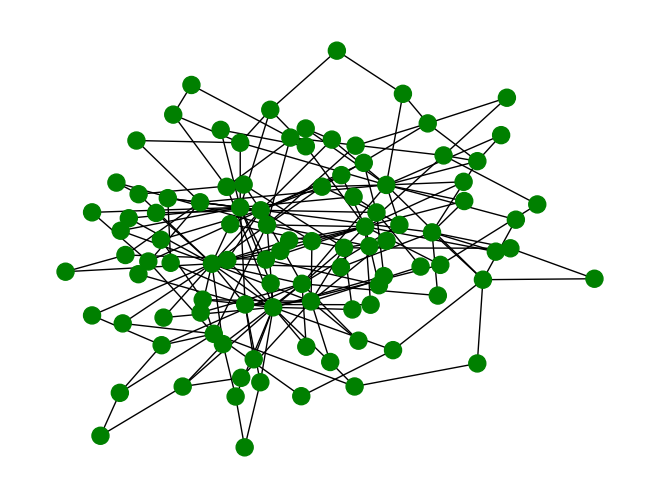

In [2]:
print(f"Random Network:")
model_random = DiffusionModel(network_type="random", initial_adopters=0.10)
model_random.run_model(10)

print(f"Small-World Network:")
model_small_world = DiffusionModel(network_type="small-world", initial_adopters=0.10)
model_small_world.run_model(10)

print(f"Scale-Free Network:")
model_scale_free = DiffusionModel(network_type="scale-free", initial_adopters=0.10)
model_scale_free.run_model(10)

In [ ]:
"""Batch runner for the simulations. Make sure to turn off the print statement in the step function in the code.
Otherwise you get a lot of print statements."""

from diffusion import DiffusionModel
from tqdm import tqdm 
import pandas as pd

iterations = 100
networks = ['random', 'small-world', 'scale-free']

def batch_run():
    all_data = []
    
    total_runs = len(networks) * iterations
    progress_bar = tqdm(total=total_runs, desc="Batch Running")

    for network in networks:
        batch_run_data = []
        for i in range(iterations):
            model = DiffusionModel(network_type = network)
            # Run the model for a fixed number of steps
            for _ in range(10):
                model.step()
            # Get model data
            m_data = model.datacollector.get_agent_vars_dataframe()
            m_data['Run'] = i
            m_data['Network'] = network
            batch_run_data.append(m_data)
            progress_bar.update(1)
        # Concatenate the data for this configuration
        batch_run_data = pd.concat(batch_run_data)
        all_data.append(batch_run_data)
    
    # Concatenate all configurations
    all_data = pd.concat(all_data)
    
    return all_data

# Run the custom batch run function
data = batch_run()

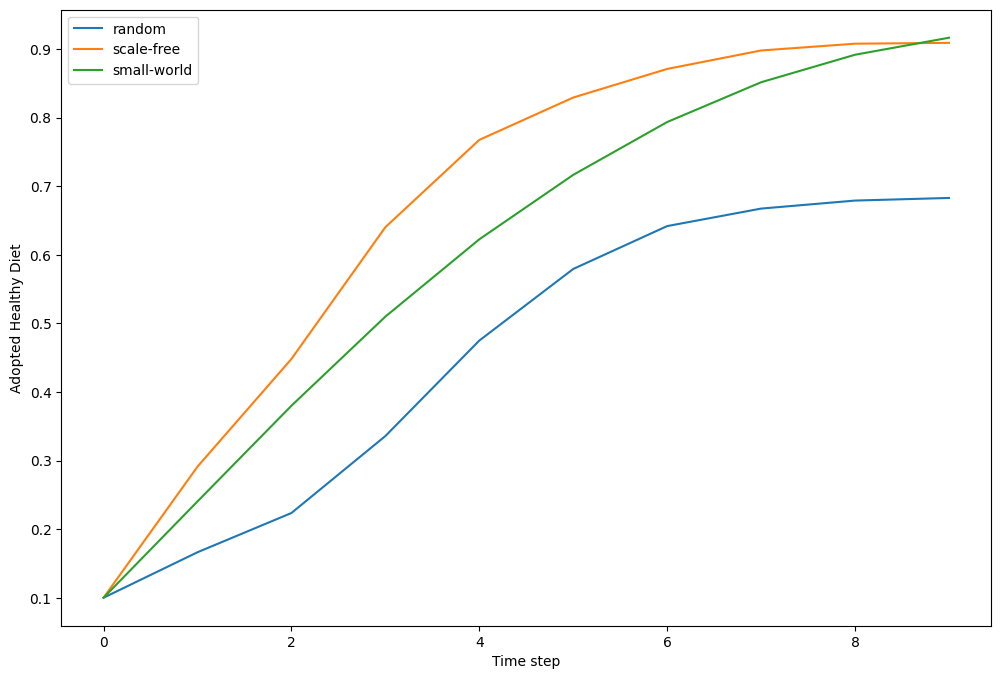

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_timeseries(data):

    grouped_data = data.groupby(['Step', 'Network'])['Adopted'].mean().reset_index()

    plt.figure(figsize=(12, 8))
    sns.lineplot(data=grouped_data, x='Step', y='Adopted', hue='Network')

    # Add labels and title

    plt.xlabel('Time step')
    plt.ylabel('Adopted Healthy Diet')
      
    # Show the plot
    plt.legend()
    plt.show()

# Run the plotting function
plot_timeseries(data)